# A Comprehensive Analysis of Nobel Prizes: Trends and Insights

## Introduction

The Nobel Prize, established by the will of Alfred Nobel in 1895, is one of the most prestigious awards in the world, honoring individuals and organizations for outstanding contributions to humanity in the fields of Physics, Chemistry, Medicine, Literature, Peace, and Economic Sciences. Since its inception in 1901, the Nobel Prize has been awarded to a diverse array of scholars, thinkers, and leaders who have made significant impacts on society.

This analysis aims to explore the historical data of Nobel Prize winners from the first award ceremony to the present day. Through an exploratory data analysis and various visual representations, we will delve into three key aspects:

1) **Global Representation**: We will examine the distribution of Nobel laureates across different countries, focusing particularly on whether there is a dominance of American recipients. Furthermore, we will analyze how the global representation has changed over time and across the different Nobel categories.

2) **Gender Representation**: We will investigate the representation of female scholars among the Nobel Prize winners, analyzing how this representation has evolved over the years and across different fields, highlighting trends in gender diversity within each Nobel category.

3) **Age of Nobel Laureates**: Finally, we will explore the typical age of Nobel Prize winners, considering how age might play a role in receiving the award. We will study how the age distribution has shifted over time and how it varies among the different Nobel categories.

This study aims to shed light on these important aspects of Nobel Prize history, providing insights into the trends and patterns that have emerged over more than a century of awards, with a particular focus on how these characteristics have evolved over time and within each specific category of the Nobel Prize.

In [406]:
# Load the required libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
import missingno as msno
import pycountry
import statsmodels.api as sm
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter
import plotly.express as px
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [ ]:
# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataframe from a CSV file
nobel = pd.read_csv("/Users/lorenzograssi/Desktop/nobel-3.csv")

# Check the first few rows of the dataframe to understand its structure
#print(nobel.head())

# Get the dimensions of the dataframe
dim = nobel.shape
print(f"The dataframe contains {dim[1]} columns for each of the {dim[0]} Nobel Prize winners")

# Print the column names and their data types
print("\nColumn Names and Data Types:")
for i in range(len(nobel.columns)):
    column_name = nobel.columns[i]
    column_dtype = nobel.dtypes[i]
    print(f"{i+1}) {column_name}: {column_dtype}")

# Alternatively, you can use the following line for a more concise output:
# print(nobel.dtypes)


As we can see in this output, in our dataset, we have only two numeric variables: year and id.

The year variable represents the temporal aspect of the data, which can be useful for time-based analyses or visualizations. On the other hand, the id variable serves as a unique identifier for each record. Since id is essentially a categorical identifier rather than a quantitative measure, it does not contribute meaningfully to summary statistics or numerical analysis.

Therefore, given the nature of these variables:

- Summary Statistics: It is unnecessary to compute summary statistics for the id variable, as it does not provide quantitative insights.
- Analytical Focus: Our analysis will primarily focus on the year variable for temporal trends and patterns, rather than performing summary statistics or numerical analyses on id.

In [323]:
# Chech the number of missing values in the dataframe
missing_values_per_column = nobel.isnull().sum()

def print_bold(text):

    bold_start = "\033[1m"
    bold_end = "\033[0m"

    print(f"{bold_start}{text}{bold_end}")

print_bold("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64


As we can observe, there are numerous missing values in the dataset. However, for our analysis, the primary variables of interest are **year** (the year in which the Nobel Prize was awarded), **category** (the category of the prize: Physics, Chemistry, Medicine, Literature, Peace, Economics), **birth_country** (the country of origin of the laureate), **sex** (the gender of the laureate), and **birth_date**.

In some of these columns, there are missing values:

- year: 0 missing values
- category: 0 missing values
- birth_country (the country of origin of the laureate): 26 missing values
- sex: 26 missing values
- birth_date: 28 missing values

It is important to consider this aspect when conducting our analysis. The outputs and insights drawn from this analysis should be evaluated with the understanding that the information is not complete. The presence of missing values in key columns may impact the robustness and accuracy of our findings. Therefore, all interpretations and conclusions should be made with this limitation in mind.

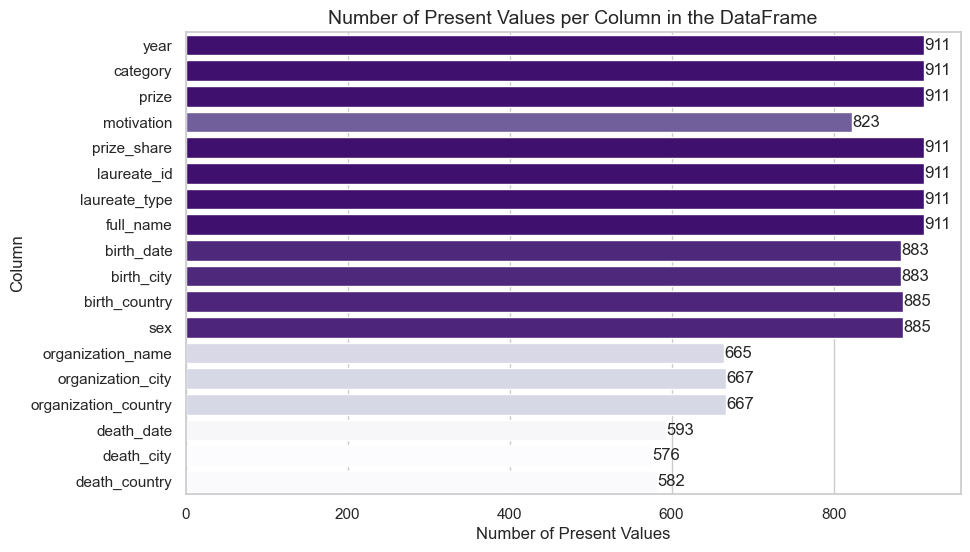

In [436]:
total_values = dim[0]
present_values = total_values - missing_values_per_column

missingvalues_df = pd.DataFrame({
    'Column': present_values.index,
    'Present Values': present_values.values
})

# Normalize the 'Present Values' for color mapping
norm = plt.Normalize(missingvalues_df['Present Values'].min(), missingvalues_df['Present Values'].max())
cmap = plt.get_cmap('Purples')  # Choose the 'Purples' colormap

# Create color values based on the colormap
colors = [cmap(norm(val)) for val in missingvalues_df['Present Values']]

# Set style and color palette
sns.set(style="whitegrid")

# Create the barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(y='Column', 
                      x='Present Values',
                      data=missingvalues_df,
                      palette=colors)  # Use the color values

# Add value labels on the bars
for p in barplot.patches:
    width = p.get_width()
    barplot.text(width + 0.5, p.get_y() + p.get_height()/2,
                 f'{width:.0f}',  # Format the number of present values
                 ha='left', va='center')
    

# Add labels and title
plt.xlabel('Number of Present Values')
plt.ylabel('Column')
plt.title('Number of Present Values per Column in the DataFrame', fontsize=14)

# Show the plot
plt.show()



























## Distribution of Nobel Prizes by Country

Having addressed the issue of missing values and prepared our dataset, we now shift our focus to analyzing the distribution of Nobel Prizes across different countries. This analysis aims to explore:

- **Global Distribution**: We will investigate how Nobel Prizes are distributed across various nations, providing a comprehensive view of the global spread of these prestigious awards.
- **American Preponderance**: Special attention will be given to examining the dominance of American laureates. We will analyze whether there is a significant concentration of Nobel Prizes awarded to individuals and organizations from the United States compared to other countries.
  
This exploration will help us understand the geographical distribution of Nobel Prizes and the extent to which American laureates are represented. Stay tuned as we delve into this aspect of the Nobel Prize data.

In [326]:
for country in nobel["birth_country"].unique():
    print(country)

Netherlands
France
Prussia (Poland)
Switzerland
Prussia (Germany)
Schleswig (Germany)
India
Sweden
Norway
Faroe Islands (Denmark)
United Kingdom
Russian Empire (Poland)
Scotland
Spain
Russia
nan
Poland
Germany
Austrian Empire (Czech Republic)
Hungary (Slovakia)
Tuscany (Italy)
Italy
United States of America
Bavaria (Germany)
British India (India)
Austrian Empire (Italy)
New Zealand
East Friesland (Germany)
Russian Empire (Ukraine)
Denmark
Luxembourg
Russian Empire (Latvia)
Belgium
Hesse-Kassel (Germany)
Germany (Russia)
Mecklenburg (Germany)
Austria
Prussia (Russia)
Australia
Austria-Hungary (Slovenia)
Ireland
Canada
Java, Dutch East Indies (Indonesia)
Austrian Empire (Austria)
Germany (Poland)
W&uuml;rttemberg (Germany)
Argentina
Austria-Hungary (Hungary)
Austria-Hungary (Austria)
Austria-Hungary (Croatia)
Russian Empire (Finland)
Austria-Hungary (Poland)
Chile
Austria-Hungary (Czech Republic)
Portugal
Japan
South Africa
Germany (France)
Iceland
China
French Algeria (Algeria)
Guadelou

By examining the 'birth_country' entries in the original dataset, it is clear that some countries are listed with their historical names (the names used at the time the Nobel Prize was awarded), followed by the current name of the territory in parentheses. To make the dataset more consistent, I will use only the current name of these countries. This means, for example, that Austria and Austria-Hungary will be categorized under the same name (Austria). This approach allows for a clearer understanding of how much a particular territory has contributed to producing Nobel Prize winners over time.

In [327]:
# Function to extract the name between parentheses or the main name if there are no parentheses
def extract_country_name(state):
    if isinstance(state, str):
        # If there are parentheses, extract the name between them
        if '(' in state and ')' in state:
            return state.split('(')[-1].split(')')[0].strip()
        # Otherwise, return the main name
        return state.strip()
    return np.nan

# Apply the extraction function to the 'nobel' DataFrame
nobel['birth_country'] = nobel['birth_country'].apply(extract_country_name)


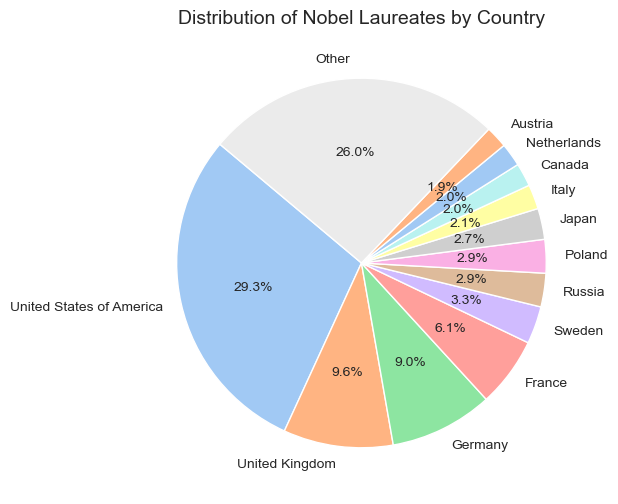

In [435]:
# Example DataFrame (replace with your actual DataFrame)
# country_counts = pd.DataFrame({
#     'country': ['USA', 'UK', 'Germany', 'France', 'Sweden', 'Italy', 'Japan', 'Canada', 'Russia', 'Netherlands', ...],
#     'nobel_count': [383, 132, 108, 70, 32, 30, 29, 28, 27, 26, ...]
# })

# Calculate the total number of Nobel laureates
total_nobel = country_counts['nobel_count'].sum()

# Calculate percentage for each country
country_counts['percentage'] = (country_counts['nobel_count'] / total_nobel) * 100

# Filter countries with percentage greater than 1.9%
filtered_counts = country_counts[country_counts['percentage'] > 1.9]

# Combine all other countries into one category
other_counts = country_counts[country_counts['percentage'] <= 1.9]
other_total = other_counts['nobel_count'].sum()

# Create a DataFrame for the 'Other' category if there are countries to include
if other_total > 0:
    other_df = pd.DataFrame({
        'country': ['Other'],
        'nobel_count': [other_total],
        'percentage': (other_total / total_nobel) * 100
    })
    # Combine filtered counts with 'Other'
    final_counts = pd.concat([filtered_counts, other_df], ignore_index=True)
else:
    final_counts = filtered_counts

# Set up the figure
plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")

# Create a pastel color palette
pastel_palette = sns.color_palette("pastel", len(final_counts))

# Define the color for 'Other'
other_color = '#EBEBEB'  # Light gray

# Create a color list for the pie chart
colors = pastel_palette.copy()
if 'Other' in final_counts['country'].values:
    colors[final_counts['country'].tolist().index('Other')] = other_color

# Create the pie chart
plt.pie(final_counts['nobel_count'], 
        labels=final_counts['country'], 
        autopct=lambda p: '{:.1f}%'.format(p),  # Display percentage for all segments
        colors=colors,  # Use pastel colors with specific color for 'Other'
        startangle=140,  # Starting angle of the pie chart
        wedgeprops={'edgecolor': 'w'},  # Add white edge color for better separation
        textprops={'fontsize': 10})  # Font size for labels

# Add a title
plt.title('Distribution of Nobel Laureates by Country', fontsize=14)

# Show the plot
plt.show()


This pie chart reveals that the **United States of America** accounts for the largest share of Nobel Prize winners in history, with **29.3%**. Other prominent countries include the United Kingdom, Germany, France, Sweden, Russia, Poland, Japan, Italy, Canada, the Netherlands, and Austria. Collectively, these countries have been the birthplaces of 74% of all Nobel Prize laureates. Therefore, we will now focus on these nations and display the number of winners from each.

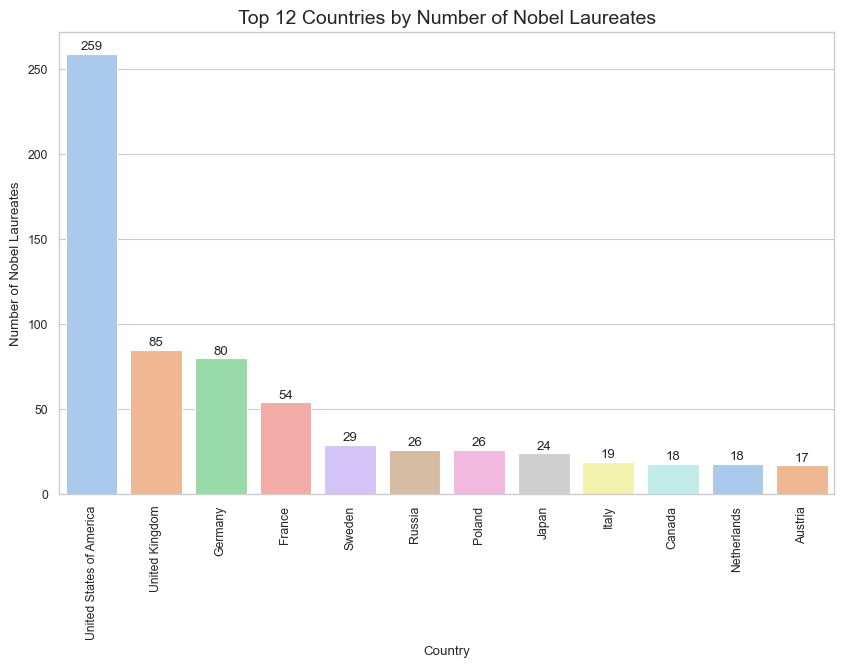

In [434]:
# Get the top 10 countries by number of Nobel laureates
top_12_countries = country_counts.head(12)

# Create the countplot for the top 10 countries
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", context="paper")
countplot = sns.barplot(data=top_12_countries, 
                        x='country', 
                        y='nobel_count', 
                        palette='pastel')  # Using a color palette for better visualization

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Nobel Laureates')
plt.title('Top 12 Countries by Number of Nobel Laureates', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add value labels on the bars
for p in countplot.patches:
    # Get the height of each bar (number of Nobel laureates)
    height = p.get_height()
    # Add the label above the bar
    countplot.text(p.get_x() + p.get_width() / 2.0,  # x position: center of the bar
                   height + 0.5,  # y position: just above the bar
                   f'{height:.0f}',  # Format the number of laureates
                   ha='center', va='bottom')

# Show the plot
plt.show()

This bar plot, in conjunction with the previously shown pie chart, clearly illustrates the significant dominance of American Nobel Prize winners. To further explore this, I will present both the number and proportion of winners from the United S\tates compared to the total number of laureates. Additionally, I will analyze how the presence of American winners has evolved over the years and identify which categories are most influenced by an American majority.



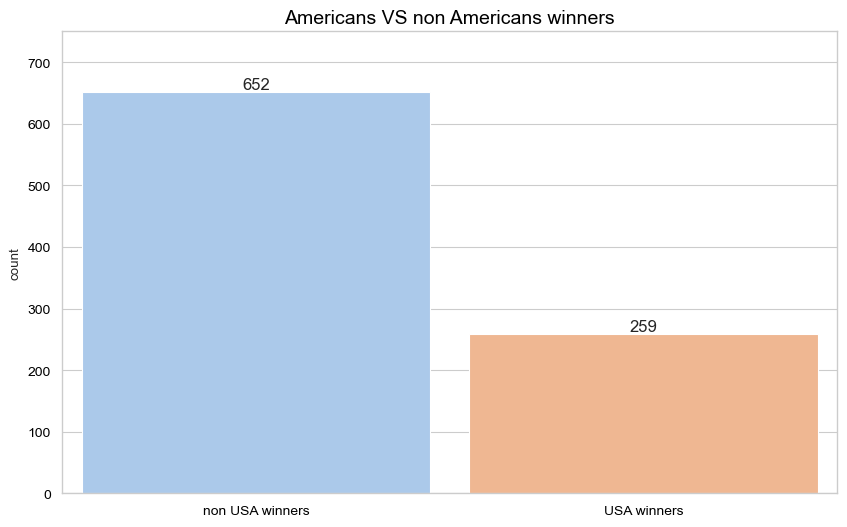

In [330]:
# Create a new variable in the nobel dataframe called "is_american"
nobel["is_american"] = nobel["birth_country"] == "United States of America"
nobel['is_american'] = nobel['is_american'].replace({True: 'USA winners', False: 'non USA winners'})


# We can now show how many Nobel Prize winners in history have been American and how many have not.
plt.figure(figsize=(10, 6))
sns.set(context="paper", style="whitegrid",palette="pastel")

# Increase the width of the bars
ax = sns.countplot(data=nobel, x="is_american", width=0.9)

# Annotate the bars with the count values
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate if the height is greater than 0
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12,  
                    xytext=(0, 5),  
                    textcoords='offset points')

plt.ylim(0, 750)
    
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

plt.xlabel("")

# Set the title for the plot
plt.title("Americans VS non Americans winners", fontsize=14, color='black')

plt.show()


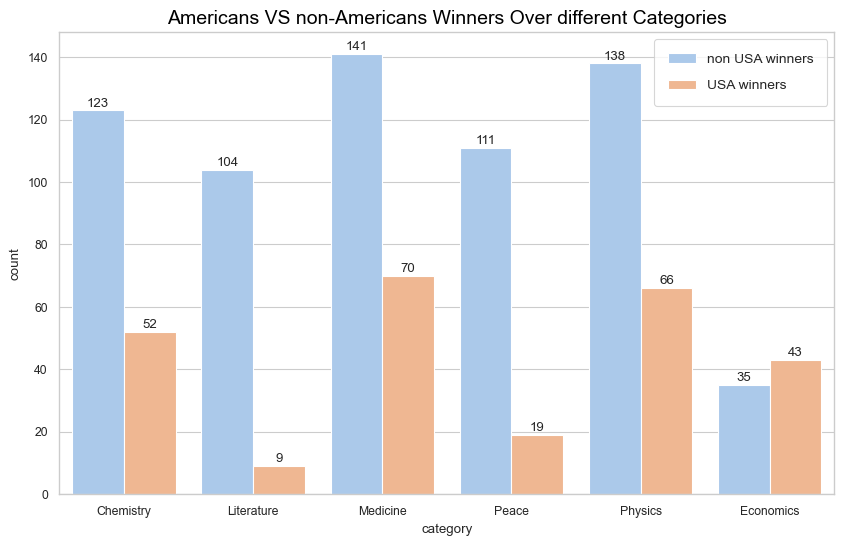

In [331]:
plt.figure(figsize=(10, 6))
sns.set(context="paper", palette="pastel", style="whitegrid")

# Create the countplot
ax = sns.countplot(data=nobel, x="category", hue="is_american")

# Add the values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),  # Position the text at the center of the bar
                ha='center', va='center', 
                xytext=(0, 5),  # Offset the text slightly above the bar
                textcoords='offset points')
plt.legend(title="",                          
           fontsize='10',
           frameon=True, 
           shadow=False,                     
           borderpad=1,                     
           labelspacing=1) 

plt.title("Americans VS non-Americans Winners Over different Categories", fontsize=14, color='black')


# Show the plot
plt.show()

Categories such as Literature and Peace appear to be areas where American laureates have historically been less dominant. In contrast, in other categories, Americans make up nearly one-third of all Nobel winners. Notably, in the field of Economics, over half of the Nobel Prizes have been awarded to scholars from the United States.

In [332]:
# Create "decade" variable
def determine_decade(year):
    return (year // 10) * 10

# Apply the function to the 'year' column in the original dataset
nobel['decade'] = nobel['year'].apply(determine_decade)

#print(nobel.head(10))

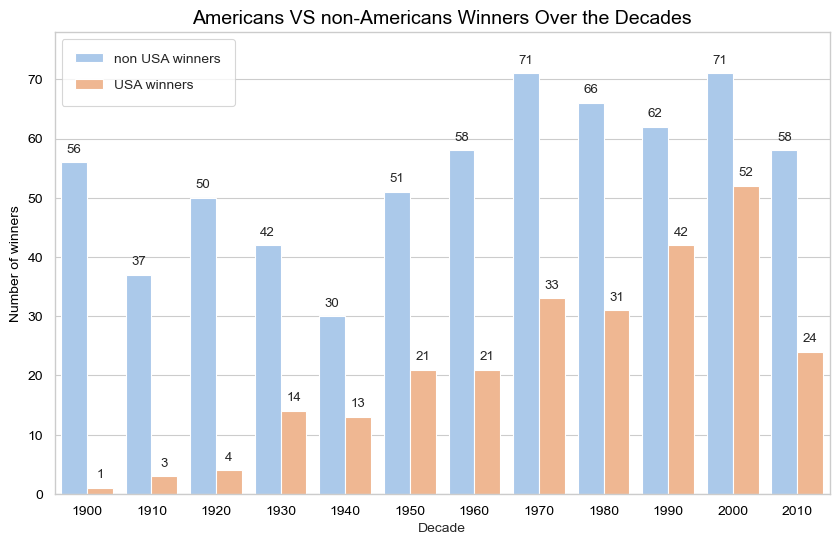

In [333]:
plt.figure(figsize=(10, 6))

# Create the countplot
ax = sns.countplot(data=nobel,
                   x="decade",
                   hue="is_american")

# Add the values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),  # Position the text at the center of the bar
                ha='center', va='bottom', 
                xytext=(0, 5),  # Offset the text slightly above the bar
                textcoords='offset points')

# Customize the legend
plt.legend(title="",                          
           fontsize='10',
           frameon=True, 
           shadow=False,                     
           borderpad=1,                     
           labelspacing=1) 

plt.ylim(0, 78)

# Customize ticks and labels
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.xlabel("Decade", fontsize=10)
plt.ylabel("Number of winners", fontsize=10, color='black')

# Set the title for the plot
plt.title("Americans VS non-Americans Winners Over the Decades", fontsize=14, color='black')

# Display the plot
plt.show()


It appears that over time, scholars born in the **United States** are becoming **increasingly represented**.

However, the graph we just visualized shows the absolute frequencies of Americans (and non-Americans) for each decade. To better understand whether Americans are becoming more represented, it is useful to calculate the relative frequencies: the proportions of Americans relative to the total number of winners. Subsequently, it will be much easier to clearly identify any trends over time.

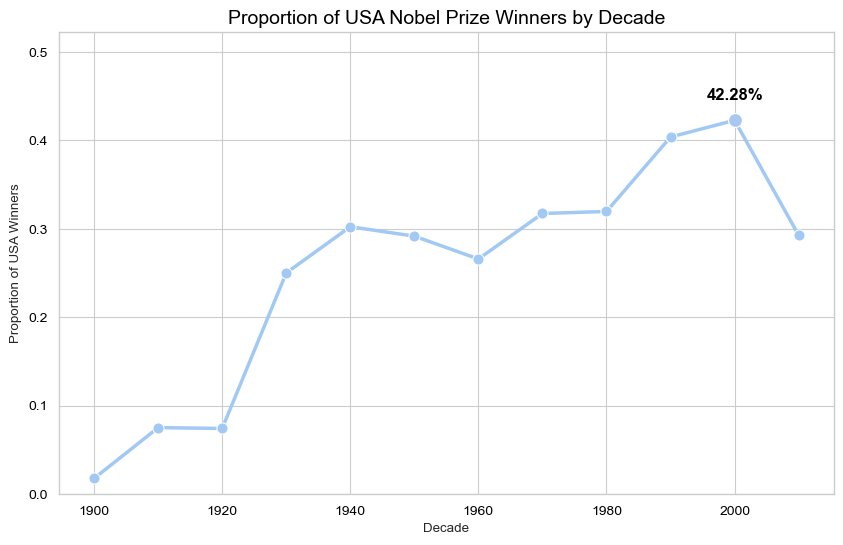

In [334]:
# Compute the number of winners from the USA over the years
nobel_USA = nobel[nobel['birth_country'] == 'United States of America']
nobel_USA_perdecade = nobel_USA.groupby('decade').size().reset_index(name='USA winners')

# Compute the number of winners not from the USA over the years
nobel_restofworld = nobel[nobel['birth_country'] != 'United States of America']
nobel_restofworld_perdecade = nobel_restofworld.groupby('decade').size().reset_index(name='Non USA winners')

# Merge the two dataframes on the "decade" column
nobel_perdecade_combined = pd.merge(nobel_USA_perdecade, nobel_restofworld_perdecade, on='decade', how='outer')

# Add a column "Total winners" that shows the total number of Nobel Prizes per decade
nobel_perdecade_combined["Total winners"] = nobel_perdecade_combined["USA winners"] + nobel_perdecade_combined["Non USA winners"]

# Compute the proportion of winners from the USA over the total number of winners
nobel_perdecade_combined["USA winners proportion"] = nobel_perdecade_combined["USA winners"] / nobel_perdecade_combined["Total winners"]

# Find the maximum proportion and the corresponding decade
max_prop = max(nobel_perdecade_combined["USA winners proportion"])
max_prop_decade = nobel_perdecade_combined.loc[nobel_perdecade_combined["USA winners proportion"] == max_prop, "decade"].values[0]

# Show the proportion of USA winners over time (decades)
sns.set(context="paper", palette="pastel", style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="decade",
                  y="USA winners proportion",
                  data=nobel_perdecade_combined,
                  linewidth=2.5,
                  marker="o",
                  markersize=8)

# Highlight the marker corresponding to the maximum value
plt.scatter(max_prop_decade, max_prop, color='#A9C8F0', s=100, edgecolor='white', zorder=8) 

# Increase the y-axis limit
plt.ylim(0, max_prop + 0.1)  # Set the upper limit of the y-axis

# Add the value above the marker
plt.text(max_prop_decade, max_prop + 0.02, f'{max_prop:.2%}',  # Position of the text
         ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Set the title and labels
plt.title("Proportion of USA Nobel Prize Winners by Decade", fontsize=14, color='black')
plt.xlabel("Decade")
plt.ylabel("Proportion of USA Winners")
plt.show()


It appears that this graph demonstrates an increasing representation of Americans in Nobel Prize awards. For instance, in the first decade of the 2000s, a notable 44% of Nobel Prizes were awarded to Americans. 

However, it is important to consider that this **dominance** has significantly **decreased over the past 15 years**, dropping to just below 30% in the most recent decade.

Let's now examine whether this trend of increased American representation is consistent across all categories or if American dominance is more pronounced in certain categories.

In [335]:
# Calculate the number of winners from the USA and the rest of the world for each category and decade
nobel_USA_perdecade_category = nobel[nobel['birth_country'] == 'United States of America'].groupby(['decade', 'category']).size().reset_index(name='USA winners')
nobel_restofworld_perdecade_category = nobel[nobel['birth_country'] != 'United States of America'].groupby(['decade', 'category']).size().reset_index(name='Non USA winners')

# Merge the two dataframes
nobel_perdecade_combined_category = pd.merge(nobel_USA_perdecade_category, nobel_restofworld_perdecade_category, on=['decade', 'category'], how='outer')

# Add the "Total winners" column
nobel_perdecade_combined_category["Total winners"] = nobel_perdecade_combined_category["USA winners"] + nobel_perdecade_combined_category["Non USA winners"]

# Compute the proportion of USA winners
nobel_perdecade_combined_category["USA winners proportion"] = nobel_perdecade_combined_category["USA winners"] / nobel_perdecade_combined_category["Total winners"]


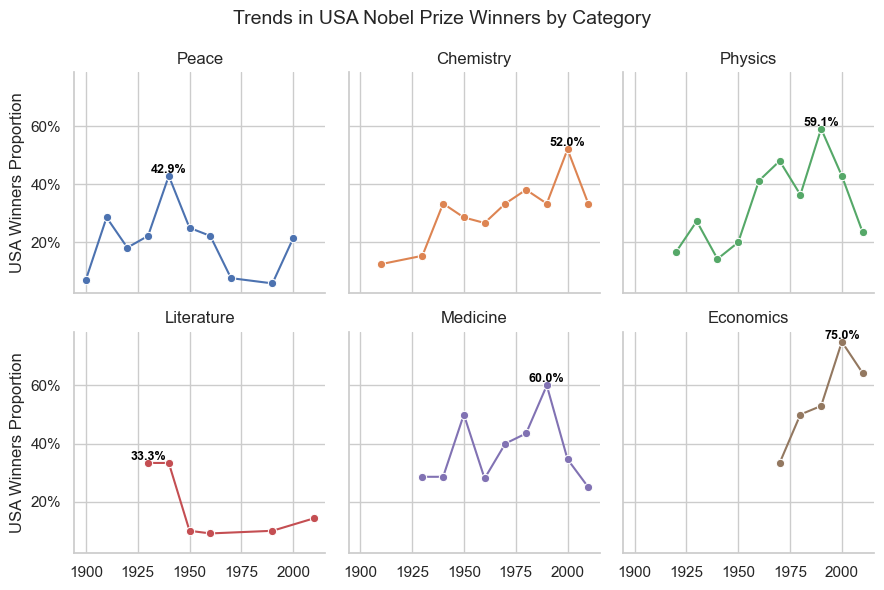

In [431]:
# Set the seaborn theme for better style
sns.set(style="whitegrid")

# Create the FacetGrid
g = sns.FacetGrid(nobel_perdecade_combined_category, col='category', col_wrap=3, height=3, aspect=1, hue="category")

# Add line plots to the grid
g.map_dataframe(sns.lineplot, x='decade', y='USA winners proportion', marker='o')

# Function to annotate the maximum values
def annotate_max(data, **kwargs):
    max_value = data['USA winners proportion'].max()
    max_decade = data.loc[data['USA winners proportion'].idxmax(), 'decade']
    plt.text(max_decade, max_value, f'{(max_value*100):.1f}%', 
             color='black', ha='center', va='bottom', fontsize=9, weight='bold')

# Apply the annotation function to each facet
g.map_dataframe(annotate_max)

# Function to format the y-axis as a percentage
def percent_formatter(x, pos):
    return f'{x*100:.0f}%'

# Add labels and titles
g.set_axis_labels('', 'USA Winners Proportion')
g.set_titles(col_template="{col_name}")

for ax in g.axes.flat:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Apply the percentage formatter to the y-axis
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Add a main title for the entire FacetGrid
plt.suptitle('Trends in USA Nobel Prize Winners by Category', fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


The trend highlighted earlier seems to be consistent across the Nobel Prizes in Chemistry, Physics, Medicine, and Economics. In each of these fields, the percentage of American laureates has steadily increased, peaking in the first decade of the 21st century. For these four categories, there is also a noticeable decrease in this percentage in recent years. 

However, the **Nobel Prize in Economics** appears to be **almost exclusively awarded to American scholars**. Despite a decline in recent years from the 75% peak reached in the 2000s, Americans remain significantly dominant in this field.

In contrast, the Nobel Prizes for Peace and Literature show a different pattern. For these categories, the prominence of American laureates has diminished significantly over the years, and it appears that the best years for American winners in these fields are already behind us.

## Analyzing Gender Representation in Nobel Prize Awards: Trends and Disparities Over Time

I will now analyze the representation of women in Nobel Prize awards to understand whether this gender is adequately represented. Additionally, I aim to investigate if, alongside the increasing focus on gender equality, any disparities have diminished over time. This analysis will provide insights into how the representation of women has evolved and whether recent efforts to promote gender equality have had a measurable impact on Nobel Prize distribution.

5.54% of Nobel Prize winners are women


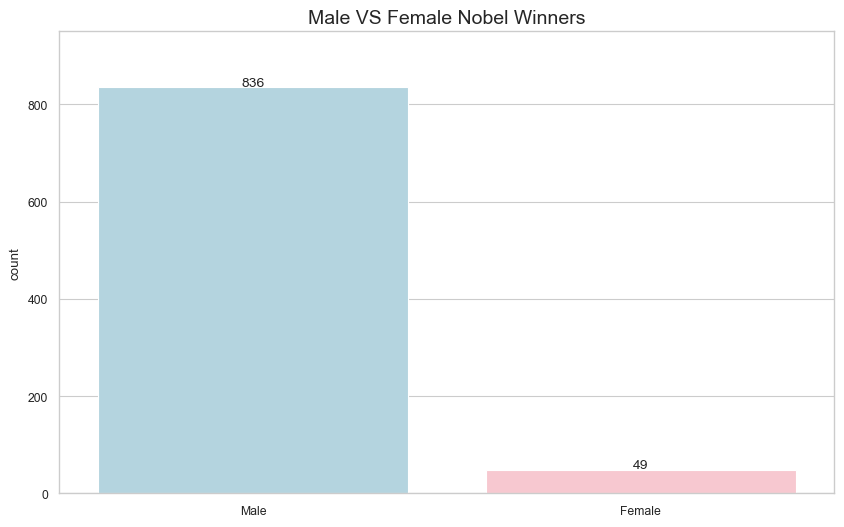

In [350]:
# Count the number of male and female Nobel winners
men_women = nobel["sex"].value_counts()

# Compute the proportion of female winners
women_prop=men_women[1]/(men_women[0]+men_women[1])
print_bold(f"{round(women_prop * 100, 2)}% of Nobel Prize winners are women")


plt.figure(figsize=(10, 6))

# Create a count plot with specific colors for each sex
ax = sns.countplot(data=nobel, x="sex", palette={"Male": "lightblue", "Female": "pink"})
sns.set(context="paper", palette="pastel", style="whitegrid")

# Annotate the bars with the count values
for p in ax.patches:
    height = p.get_height()
    # Only annotate if the value is greater than zero
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    fontsize=10,  # Font size
                    xytext=(0, 3),  # Slightly move the text upward
                    textcoords='offset points')

plt.ylim(0, 950)
plt.xlabel("")  # Empty label for x-axis

# Set the title for the plot
plt.title("Male VS Female Nobel Winners", fontsize=14)

plt.show()


We can observe that only a **small proportion of Nobel Prize winners** throughout the history of the award have been **women**.

Now, let's examine how women are represented across the various categories of the Nobel Prize.

sex         Female Percentage
category                     
Chemistry                2.29
Economics                1.28
Literature              12.39
Medicine                 5.69
Peace                   15.38
Physics                  0.98


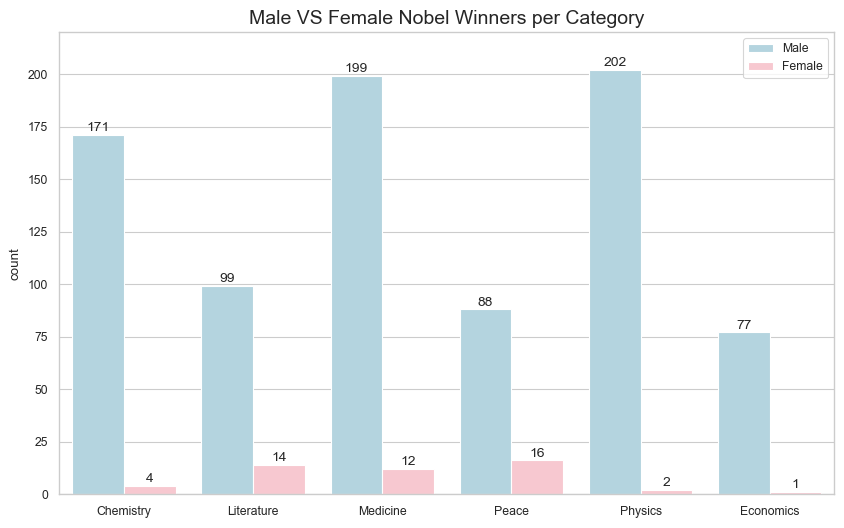

In [378]:
category_gender_counts = nobel.groupby(['category', 'sex']).size().unstack(fill_value=0)

# Step 2: Calculate the total number of winners per category
category_totals = category_gender_counts.sum(axis=1)

# Step 3: Calculate the percentage of female winners per category
category_gender_counts['Female Percentage'] = round((category_gender_counts['Female'] / category_totals) * 100, 2)

# Print the result
print(category_gender_counts[['Female Percentage']])



# Create the plot
plt.figure(figsize=(10, 6))

# Create a count plot with different colors for each sex and hue by category
ax = sns.countplot(data=nobel, x="category", palette={"Male": "lightblue", "Female": "pink"}, hue="sex")

sns.set(context="paper", palette="pastel", style="whitegrid")


# Add values above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),  # Position of the text
                ha='center', va='center', 
                fontsize=10, 
                xytext=(0, 5),  # Offset the text upward
                textcoords='offset points')

plt.legend(title="")

plt.xlabel("")
plt.ylim(0, 220)
plt.title("Male VS Female Nobel Winners per Category", fontsize=14)

# Show the plot
plt.show()

It appears that the only categories with **notable representation** of women, although still far from parity, are **Literature** (15,38% of female winners) and **Peace** (12.39% of female winners).

In contrast, technical and scientific fields seem to be predominantly occupied by men. For instance, there is only one female Nobel laureate in Economics and just two in Physics.

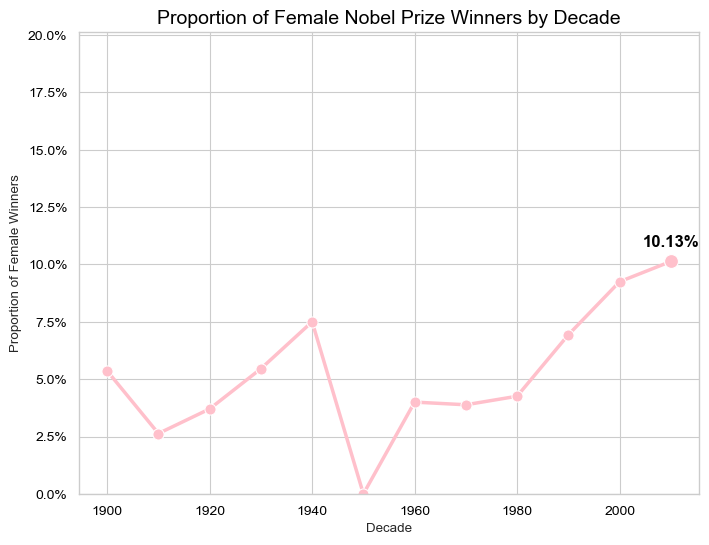

Highest proportion of female winners: 10.13 %
Decade with the highest proportion of female winners: 2010


In [379]:
# Filter data for female winners
nobel_F = nobel[nobel['sex'] == 'Female']
nobel_F_perdecade = nobel_F.groupby('decade').size().reset_index(name='Female winners')

# Filter data for male winners
nobel_M = nobel[nobel['sex'] == 'Male']
nobel_M_perdecade = nobel_M.groupby('decade').size().reset_index(name='Male winners')

# Merge the two dataframes on the "decade" column
nobel_FM = pd.merge(nobel_F_perdecade, nobel_M_perdecade, on='decade', how='outer')

# Fill any NaN values with 0 (in case there are decades without winners of a gender)
nobel_FM = nobel_FM.fillna(0)

# Add a "Total winners" column to show the total number of winners per decade
nobel_FM["Total winners"] = nobel_FM["Female winners"] + nobel_FM["Male winners"]

# Calculate the proportion of female winners out of the total winners
nobel_FM["Female winners proportion"] = nobel_FM["Female winners"] / nobel_FM["Total winners"]

# Find the maximum proportion and the corresponding decade
max_propF = nobel_FM["Female winners proportion"].max()
max_prop_decadeF = nobel_FM.loc[nobel_FM["Female winners proportion"] == max_propF, "decade"].values[0]

# Show the proportion of female winners over time (decades)
sns.set(context="paper", palette="pastel", style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.lineplot(x="decade",
                  y="Female winners proportion",
                  data=nobel_FM,
                  linewidth=2.5,
                  marker="o",
                  markersize=8,
                  color='pink')  # Set the line color to 'pink'

# Highlight the marker corresponding to the maximum value
plt.scatter(max_prop_decadeF, max_propF, color='pink', s=100, edgecolor='white', zorder=8) 

# Increase the y-axis limit
plt.ylim(0, max_propF + 0.1)  # Set the upper limit of the y-axis

# Add the value above the marker
plt.text(max_prop_decadeF, max_propF + 0.005, f'{max_propF:.2%}',  # Position of the text
         ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Format the y-axis as a percentage
ax.yaxis.set_major_formatter(PercentFormatter(1))

# Set fonts for the axes
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Set the title and labels
plt.title("Proportion of Female Nobel Prize Winners by Decade", fontsize=14, color='black')
plt.xlabel("Decade")
plt.ylabel("Proportion of Female Winners")
plt.show()

# Display the results
print("Highest proportion of female winners:", round(max_propF*100, 2), "%")
print("Decade with the highest proportion of female winners:", max_prop_decadeF)


We can observe that the significant gender disparity previously noted has shown some improvement over time. In fact, in the most recent decade, 10% of Nobel Prizes were awarded to women. While this represents progress, a 10% representation is **still far from achieving significant gender parity**.

There is considerable work still needed to ensure that female scientists, writers, and leaders receive recognition that more accurately reflects their contributions and achievements. Continued efforts and systemic changes are essential to bridge this gap and move towards a more equitable distribution of Nobel Prizes across genders.

Let's now examine which categories of Nobel Prizes are increasingly recognizing female scholars. This analysis will help us identify whether there are specific fields where women’s representation is growing more notably, and whether any trends are emerging in the awarding of Nobel Prizes to women in these categories. By understanding these patterns, we can gain insights into areas where progress is being made and where further efforts are needed to achieve gender equity in Nobel Prize awards.

In [311]:
# Group data by decade and category for female winners
nobel_F_perdecade_category = nobel[nobel['sex'] == 'Female'].groupby(['decade', 'category']).size().reset_index(name='Female winners')

# Group data by decade and category for male winners
nobel_M_perdecade_category = nobel[nobel['sex'] == 'Male'].groupby(['decade', 'category']).size().reset_index(name='Male winners')

# Merge the two DataFrames based on decade and category
nobelFM_perdecade_combined_category = pd.merge(nobel_F_perdecade_category, nobel_M_perdecade_category, on=['decade', 'category'], how='outer')

# Fill NaN values with 0 (for cases where there are no winners of a certain gender in a decade/category)
nobelFM_perdecade_combined_category = nobelFM_perdecade_combined_category.fillna(0)

# Add a column for the total number of winners per decade and category
nobelFM_perdecade_combined_category["Total winners"] = nobelFM_perdecade_combined_category["Female winners"] + nobelFM_perdecade_combined_category["Male winners"]

# Calculate the proportion of female winners out of the total winners per decade and category
nobelFM_perdecade_combined_category["Female winners proportion"] = nobelFM_perdecade_combined_category["Female winners"] / nobelFM_perdecade_combined_category["Total winners"]


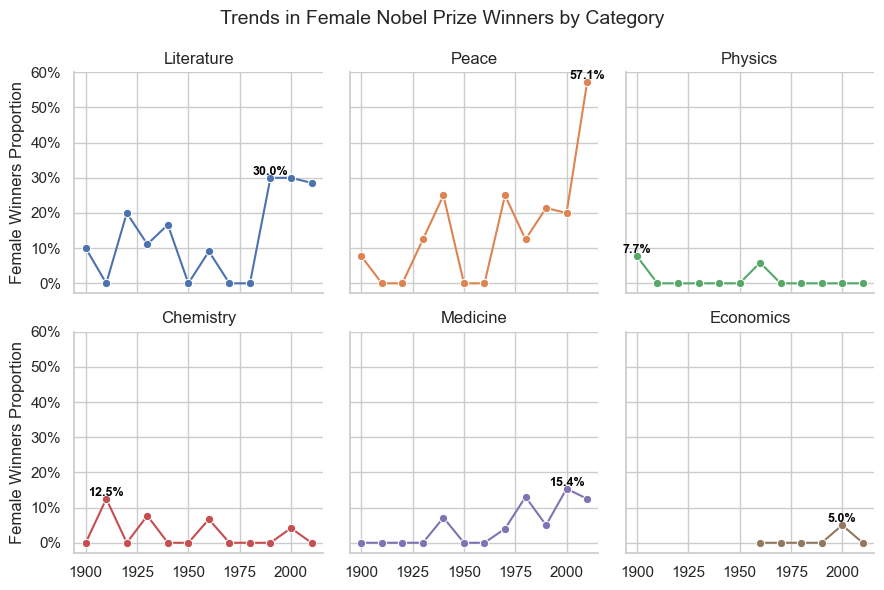

In [430]:
# Set the seaborn theme for a better style
sns.set(style="whitegrid")

# Create the FacetGrid
g = sns.FacetGrid(nobelFM_perdecade_combined_category, col='category', col_wrap=3, height=3, aspect=1, hue="category")

# Add line plots
g.map_dataframe(sns.lineplot, x='decade', y='Female winners proportion', marker='o')

# Function to annotate maximum values
def annotate_max(data, **kwargs):
    max_value = data['Female winners proportion'].max()
    max_decade = data.loc[data['Female winners proportion'].idxmax(), 'decade']
    plt.text(max_decade, max_value, f'{(max_value*100):.1f}%', 
             color='black', ha='center', va='bottom', fontsize=9, weight='bold')

# Apply the annotation function to each facet
g.map_dataframe(annotate_max)

# Function to format the y-axis as percentage
def percent_formatter(x, pos):
    return f'{x*100:.0f}%'

# Add labels and titles
g.set_axis_labels('', 'Female Winners Proportion')
g.set_titles(col_template="{col_name}")

for ax in g.axes.flat:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Apply the percentage formatter to the y-axis
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Add a main title for the entire FacetGrid
plt.suptitle('Trends in Female Nobel Prize Winners by Category', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The positive trend previously highlighted is evident in several Nobel Prize categories. For instance:

- **Literature**: Female representation has reached approximately 30% of Nobel laureates.
- **Peace**: In the most recent decade, more women than men have been awarded the Nobel Peace Prize.
- **Medicine**: Female representation has improved significantly, rising from nearly nonexistent levels up to the mid-20th century to around 15% today.
  
In contrast, fields such as **Physics**, **Economics**, and **Chemistry** do not share this positive trend. The gender disparity in these categories remains largely unchanged since the inception of the Nobel Prizes. This indicates that gender equality efforts have not yet made a significant impact in these scientific disciplines.

## Analyzing Trends in the Age of Nobel Prize Winners: Insights by Category and Time

I will now focus on analyzing the age of Nobel Prize winners, including a breakdown by award category. This analysis aims to uncover any significant trends or patterns related to the age of laureates. By examining age distributions across different Nobel categories and over time, we can gain insights into whether there are notable trends or shifts in the age at which individuals are recognized with the Nobel Prize.

In [388]:
# To determine the age of Nobel Prize winners, we need to calculate the difference between the year the prize was awarded and the year the winner was born.

# First we need to check weather the two variables are of the same type, in order to compute the subtraction
print(nobel["year"].head())
print(nobel["birth_date"].head())


0    1901
1    1901
2    1901
3    1901
4    1901
Name: year, dtype: int64
0    1852-08-30
1    1839-03-16
2    1854-03-15
3    1828-05-08
4    1822-05-20
Name: birth_date, dtype: object


In [389]:
# Since the two variables are of different type, there is the need to compute a trasformation

# But we also have to check the presence of missing value
print(nobel['birth_date'].isna().sum(), "missing values")

28 missing values


In [391]:
# Drop the missing values
nobel = nobel.dropna(subset=['birth_date'])
print(nobel['birth_date'].isna().sum(), "missing values remained")

0 missing values remained


In [394]:
# Create "birth_year" variable, saving from the "birth_date" only the year
nobel['birth_year'] = nobel['birth_date'].str[:4]
nobel['birth_year']=nobel['birth_year'].astype(int)
print(nobel['birth_year'].head())

0    1852
1    1839
2    1854
3    1828
4    1822
Name: birth_year, dtype: int64


In [395]:
# We can now compute the subtraction
nobel["age"]=nobel["year"]-nobel["birth_year"]
print(nobel["age"].head())

0    49
1    62
2    47
3    73
4    79
Name: age, dtype: int64


In [396]:
# Find the youngest winner
min_age = min(nobel["age"])

min_age_index = nobel["age"].idxmin()

name_at_min_age = nobel.loc[min_age_index, 'full_name']

cat_min_age=nobel.loc[min_age_index, 'category']

print(f"Youngest winner ({min_age} years old): {name_at_min_age} ({cat_min_age})")


# Find the oldest winner
max_age = max(nobel["age"])

max_age_index = nobel["age"].idxmax()

name_at_max_age = nobel.loc[max_age_index, 'full_name']

cat_max_age=nobel.loc[max_age_index, 'category']

print(f"Oldest winner ({max_age} years old): {name_at_max_age} ({cat_max_age})")




Youngest winner (17 years old): Malala Yousafzai (Peace)
Oldest winner (90 years old): Leonid Hurwicz (Economics)


In [405]:
# Compute descriptive statistics
age_summary = nobel["age"].describe()

print_bold("Summary statistics for 'age'")
print("")
print(age_summary)

Summary statistics for 'age'

count    883.000000
mean      59.453001
std       12.399290
min       17.000000
25%       50.000000
50%       60.000000
75%       69.000000
max       90.000000
Name: age, dtype: float64


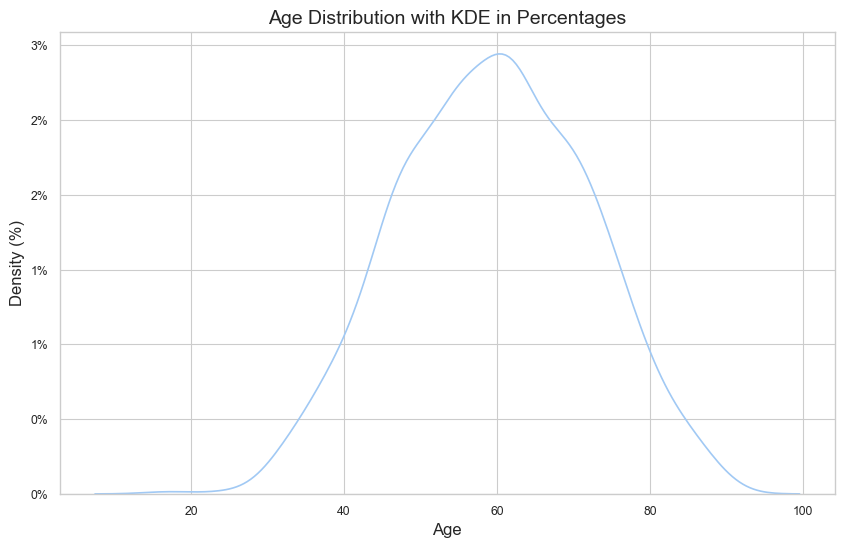

In [440]:
# Set the seaborn theme for better style
sns.set(palette="pastel", context="paper", style="whitegrid")

plt.figure(figsize=(10, 6))

# Create the KDE plot
ax = sns.kdeplot(data=nobel, x="age")

# Modify y-axis labels to show percentages
y_ticks = ax.get_yticks()  # Get current y-axis values
ax.set_yticklabels([f'{int(tick * 100)}%' for tick in y_ticks])

# Add labels and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density (%)", fontsize=12)
plt.title("Age Distribution with KDE in Percentages", fontsize=14)

plt.show()


To gain a better understanding of the distribution of Nobel Prize winners' ages, we can assess whether the data follows a **normal distribution**. 

To do this, we can start with graphical tools such as a histogram, which visually represents the distribution, and a Q-Q plot (a graphical technique that compares the observed distribution of data to a theoretical normal distribution).

Following the graphical analysis, we can apply statistical tests, such as the **Shapiro-Wilk normality test**. This test provides a more formal assessment of whether the data deviates from normality.

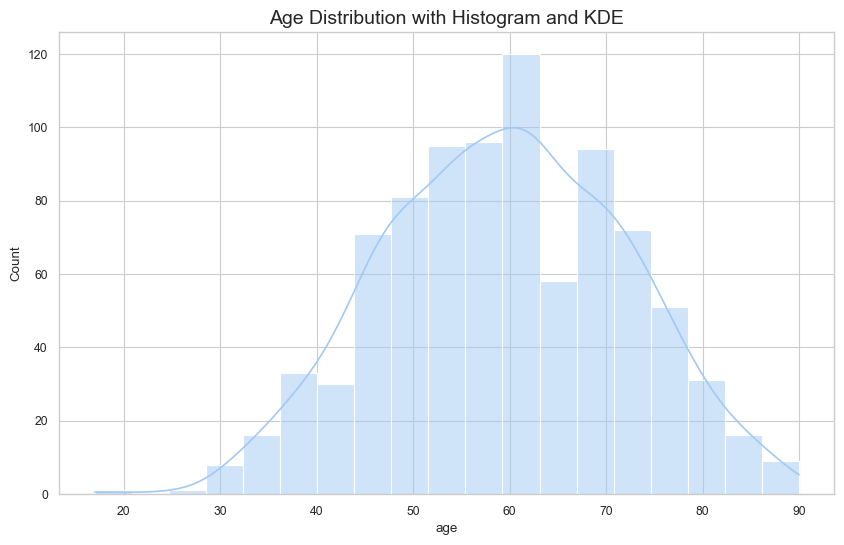

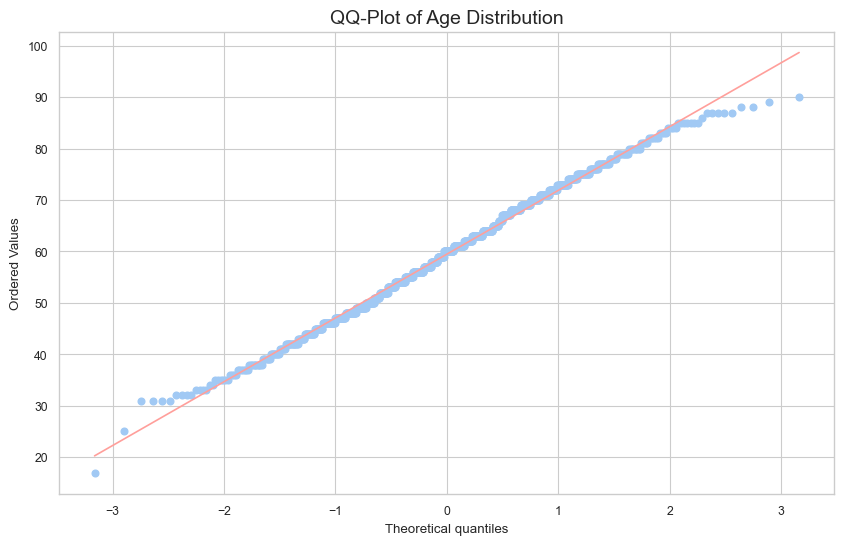

Shapiro-Wilk Test: Statistics=0.9950426816940308, p-value=0.005712578073143959


In [442]:
sns.set(palette="pastel", context="paper", style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(nobel["age"], kde=True)
plt.title('Age Distribution with Histogram and KDE', fontsize=14)
plt.show()

# Q-Q Plot
sns.set(palette="pastel", context="paper", style="whitegrid")
plt.figure(figsize=(10, 6))
stats.probplot(nobel["age"], dist="norm", plot=plt)
plt.title('QQ-Plot of Age Distribution', fontsize=14)
plt.show()

# Shapiro-Wilk Test
stat, p_value = stats.shapiro(nobel["age"])
print(f'Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}')


The p-value is relatively low; however, it is not smaller than the conventional significance level (α) of 0.05. This means that we do not reject the null hypothesis. Consequently, we do not have sufficient evidence to contradict the assumption of normality.

In conclusion, we can say that the ages of Nobel Prize winners at the time of the award are **approximately normally distributed** around the mean, which is about 60 years.

From the Q-Q plot, we observe that the distribution of ages is very close to the theoretical normal distribution. However, it is noticeable that the distribution has lighter tails. This indicates that the **values** are relatively **concentrated around the mean**, with fewer extreme values compared to a perfectly normal distribution.

In [403]:
# Compute descriptive statistics for each category

age_summary_by_category = nobel.groupby("category")["age"].describe()
print_bold("Summary statistics for 'age' for different categories")
print("")
print(age_summary_by_category)

Summary statistics for 'age' for different categories

            count       mean        std   min    25%   50%   75%   max
category                                                              
Chemistry   174.0  58.040230  11.457062  35.0  50.00  57.0  67.0  85.0
Economics    78.0  67.076923   8.091633  51.0  61.25  67.0  72.5  90.0
Literature  113.0  64.672566  10.247336  42.0  57.00  67.0  73.0  88.0
Medicine    211.0  57.971564  11.682268  32.0  49.00  57.0  65.0  87.0
Peace       104.0  61.394231  12.982003  17.0  54.00  62.0  71.0  87.0
Physics     203.0  55.374384  13.693886  25.0  45.00  54.0  64.0  88.0


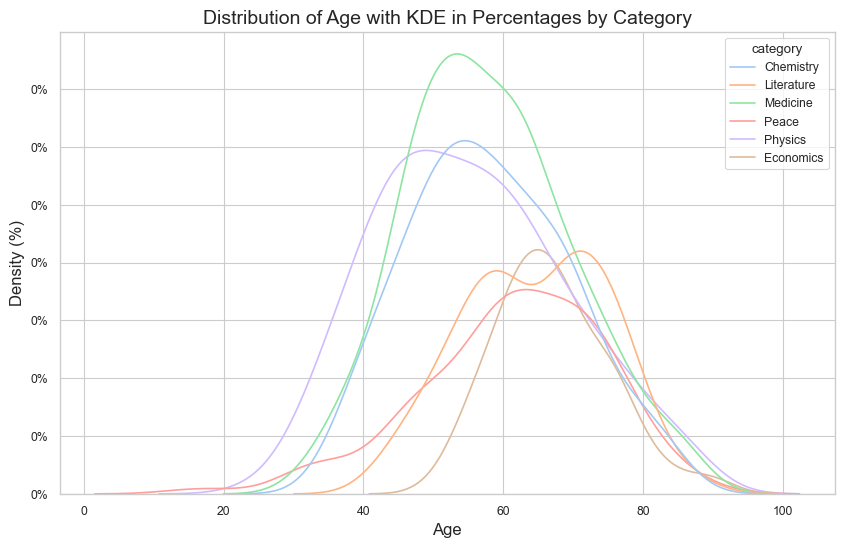

In [438]:
sns.set(palette="pastel", context="paper", style="whitegrid")

plt.figure(figsize=(10, 6))

# Create the KDE plot with hue for categories
ax = sns.kdeplot(data=nobel, x="age", hue="category")

# Modify y-axis labels to show percentages
y_ticks = ax.get_yticks()  # Get current y-axis values
ax.set_yticklabels([f'{int(tick * 100)}%' for tick in y_ticks])

# Add labels and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density (%)", fontsize=12)
plt.title("Distribution of Age with KDE in Percentages by Category", fontsize=14)

plt.show()


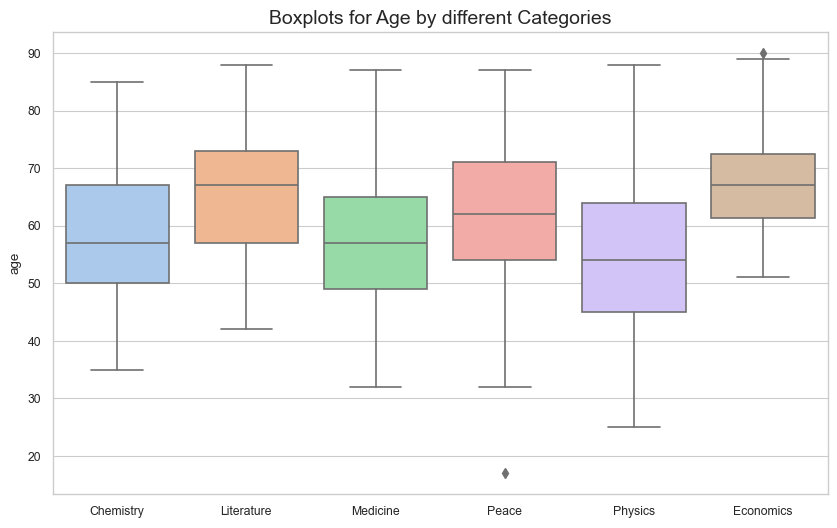

In [439]:
plt.figure(figsize=(10, 6))
sns.set(palette="pastel", context="paper", style="whitegrid")
sns.boxplot(data=nobel,
            y="age",
            x="category")
plt.xlabel("")
plt.title("Boxplots for Age by different Categories", fontsize=14)

plt.show()

The summary statistics of age across different categories, along with the KDE plots and boxplots, provide insights into how the ages of Nobel Prize winners vary by category.

Nobel Prizes in **Literature** and **Economics** have the **oldest** average age of winners, with means of 64.6 years and 67 years, respectively. However, the Economics category exhibits less variance around the mean and has fewer younger winners, with the youngest laureate being 51 years old. 

In contrast, the categories with the **youngest** winners are **Chemistry**, **Physics**, and **Medicine**.

The next step is to investigate whether there is a trend in the ages of Nobel Prize winners over the years. Are younger scholars more likely to be awarded today? Has there been an increase in the average age of laureates over time?

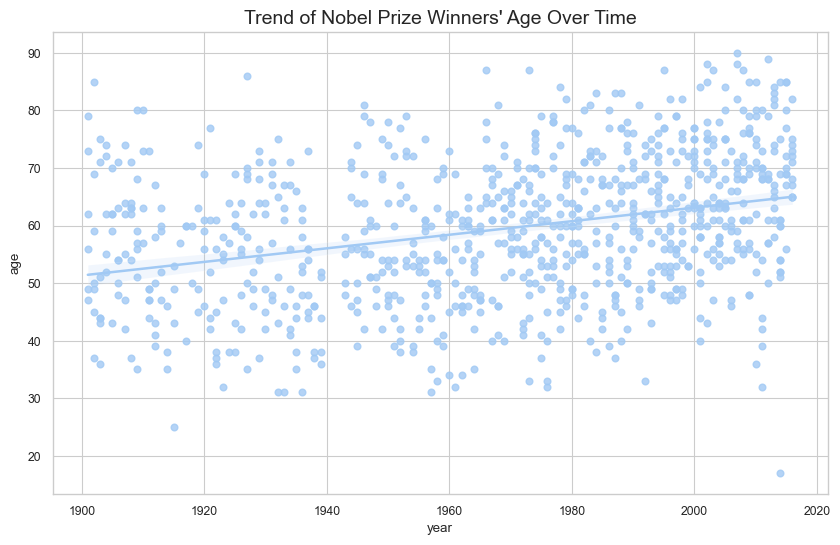

In [425]:
# Plot that shows the relation between year and age
plt.figure(figsize=(10, 6))
sns.set(palette="pastel", context="paper", style="whitegrid")

ax=sns.regplot(data=nobel,
               x="year",
               y="age")

plt.title("Trend of Nobel Prize Winners' Age Over Time", fontsize=14)

plt.show() 

The scatterplot just presented suggests that **Nobel Prizes have increasingly been awarded to older scholars over time**.

To assess the significance of this relationship, a linear regression analysis will be conducted. However, to ensure that the results are not influenced by the "year" variable, a new variable called "year_from_firstnobel" will be calculated. This variable will represent the number of years since 1901, the year in which the first Nobel Prize was awarded.

In [418]:
# Create the new variable "year_from_firstnobel"
nobel["year_from_firstnobel"]=nobel["year"]-min(nobel["year"])
print(nobel["year_from_firstnobel"])

0        0
1        0
2        0
3        0
4        0
      ... 
906    115
907    115
908    115
909    115
910    115
Name: year_from_firstnobel, Length: 883, dtype: int64


In [419]:
X = nobel[['year_from_firstnobel']]  # Regressor
y = nobel['age']  # Response variable

# Add a constant for the intercept
X_with_const = sm.add_constant(X)

# Create and adapt a regression model
model = sm.OLS(y, X_with_const).fit()

# Print the result of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     95.15
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           2.04e-21
Time:                        13:26:12   Log-Likelihood:                -3430.2
No. Observations:                 883   AIC:                             6864.
Df Residuals:                     881   BIC:                             6874.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   51.4348 

The most interesting result from the regression is the coefficient of 0.1179, which indicates that the average age of Nobel Prize winners increases by approximately 0.12 years for each year since 1901. This coefficient has an almost negligible p-value, suggesting that the relationship between the independent variable (time from 1901) and the dependent variable (age) is statistically significant. Therefore, we reject the null hypothesis, which posits that the coefficient is equal to zero, and conclude that **time** indeed has a **significant impact on the age** of Nobel Prize winners.


Let's now apply the same approach to understand how the average age of Nobel Prize winners has changed over time, but this time, we'll analyze it separately for each category. To achieve this, we'll use graphical representations and perform linear regression for each category to identify any trends in the age of winners over time.

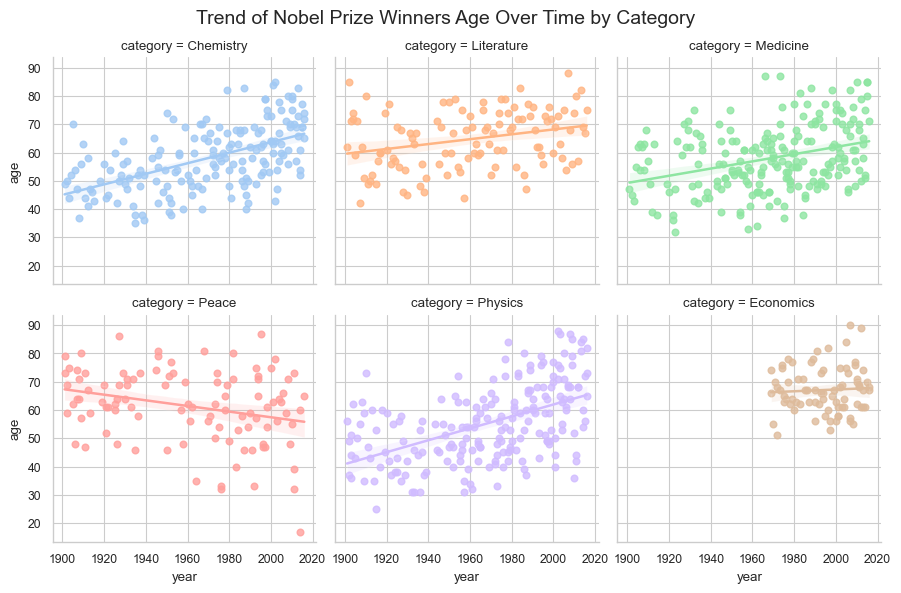

In [427]:
sns.set(style="whitegrid", context="paper", palette="pastel")
g = sns.FacetGrid(nobel, col="category", col_wrap=3, height=3, aspect=1, hue="category")

g.map(sns.regplot, "year", "age")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Trend of Nobel Prize Winners Age Over Time by Category', fontsize=14)

plt.show()

In [422]:

for cat in nobel["category"].unique():
    df = nobel[nobel["category"] == cat]
    X1 = df[['year_from_firstnobel']]
    y1 = df["age"]

    X1_with_const = sm.add_constant(X1)
    model = sm.OLS(y1, X1_with_const).fit()
    
    # Obtain the summary of the regression
    summary_df = pd.DataFrame(model.summary2().tables[1])

    # Select the first four columns 
    try:
        summary_df = summary_df[['Coef.', 't', 'P>|t|']]
    except KeyError as e:
        print(f"Errore nella selezione delle colonne: {e}")
    
    # Add a column that shows the level of significance 
    def significance_stars(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return ''

    if 'P>|t|' in summary_df.columns:
        summary_df['Significance'] = summary_df['P>|t|'].apply(significance_stars)

    # Print the results 
    print_bold(cat)
    print(summary_df)
    print("-"*70)


Chemistry
                          Coef.          t         P>|t| Significance
const                 45.212492  26.564069  9.122737e-63          ***
year_from_firstnobel   0.186515   8.355211  2.109134e-14          ***
----------------------------------------------------------------------
Literature
                          Coef.          t         P>|t| Significance
const                 59.635006  32.240171  3.448548e-58          ***
year_from_firstnobel   0.086236   3.148081  2.111112e-03           **
----------------------------------------------------------------------
Medicine
                          Coef.          t         P>|t| Significance
const                 49.377681  26.830842  1.255800e-69          ***
year_from_firstnobel   0.127223   5.127103  6.690805e-07          ***
----------------------------------------------------------------------
Peace
                          Coef.          t         P>|t| Significance
const                 67.312729  28.359405  3.47370


The results clearly indicate a **positive relationship** between time and the average age of Nobel Prize winners in the categories of **Literature, Medicine, Chemistry, and Physics**. Notably, Chemistry and Physics exhibit the most significant increases in average age over time.

The only category showing a significant **opposite trend** is the **Peace** Prize, where the average age of winners has been decreasing. 

Meanwhile, the **Economics** Prize, which has the highest average age among all categories, **does not display any significant trend** in either direction.